In [25]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [5]:
data = pd.read_csv('Databel - Data.csv')

data['State'] = data['State'].astype('category')
data['Churn Category'] = data['Churn Category'].astype('category')
data['Churn Reason'] = data['Churn Reason'].astype('category')

categorical_cols = ['Intl Plan', 'Intl Active', 'Unlimited Data Plan', 'Gender', 'Under 30', 'Senior',
                    'Group', 'Device Protection & Online Backup', 'Contract Type', 'Payment Method', 'Churn']
for col in categorical_cols:
    if col in data.columns:
        data[col] = data[col].astype('category')

churn_info = data[['Churn Category', 'Churn Reason']]
data = data.drop(columns=['Churn Category', 'Churn Reason'])

X = data.drop(['Churn', 'Customer ID', 'Phone Number'], axis=1)
y = data['Churn'].map({'No': 0, 'Yes': 1})

In [26]:
warnings.filterwarnings("ignore")

data = pd.read_csv('Databel - Data.csv')

data['State'] = data['State'].astype('category')
data['Churn Category'] = data['Churn Category'].astype('category')
data['Churn Reason'] = data['Churn Reason'].astype('category')

categorical_cols = ['Intl Plan', 'Intl Active', 'Unlimited Data Plan', 'Gender', 'Under 30', 'Senior',
                    'Group', 'Device Protection & Online Backup', 'Contract Type', 'Payment Method', 'Churn']

for col in categorical_cols:
    if col in data.columns:
        data[col] = data[col].astype('category')

churn_info = data[['Churn Category', 'Churn Reason']]
data = data.drop(columns=['Churn Category', 'Churn Reason'])

X = data.drop(['Churn', 'Customer ID', 'Phone Number'], axis=1)
y = data['Churn'].map({'No': 0, 'Yes': 1})

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
}

results = {}

for name, model in models.items():
    # Use scaled features only for KNN & Logistic Regression
    if name in ["KNN", "Logistic Regression"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted') 
    results[name] = {"Accuracy": accuracy, "F1-Score": f1}

results_df = pd.DataFrame(results).T
print(results_df)

                     Accuracy  F1-Score
KNN                  0.817638  0.811170
Logistic Regression  0.891878  0.890117
Random Forest        0.883906  0.875564


In [27]:
best_model = models["Logistic Regression"] 

y_pred_test = best_model.predict(X_test_scaled)
y_pred_proba_test = best_model.predict_proba(X_test_scaled)

test_results = X_test.copy()
test_results['Actual_Churn'] = y_test.values
test_results['Predicted_Churn'] = y_pred_test
test_results['False_Prediction_Probability'] = y_pred_proba_test[:, 0] 
test_results['True_Prediction_Probability'] = y_pred_proba_test[:, 1]   

test_results = test_results.merge(churn_info.loc[y_test.index], left_index=True, right_index=True)

test_results.to_csv('/Users/raman/Downloads/predicted_dataset.csv', index=False)

print("Predictions saved successfully!")


Predictions saved successfully!


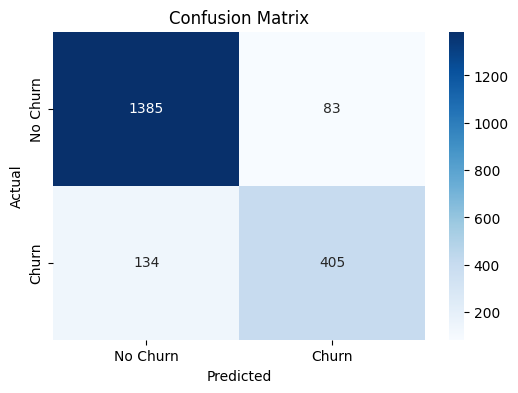

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()